In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
import tensorflow as tf

In [3]:
!pip install nltk
import nltk

# Read the CSV

In [4]:
data= pd.read_csv("mtsamples 4.csv", index_col=[0])
data

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


In [6]:
del data['keywords']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


In [8]:
data.isnull().sum()

description           0
medical_specialty     0
sample_name           0
transcription        33
dtype: int64

In [9]:
data= data.dropna(axis = 0, how ='any') 
data.sample(5)

,description,medical_specialty,sample_name,transcription
3287,"History of diabetes, osteoarthritis, atrial f...",General Medicine,H&P - Gen Med - 2,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
2592,Exam under anesthesia. Removal of intrauteri...,Obstetrics / Gynecology,Intrauterine Clots Removal,"PREOPERATIVE DIAGNOSIS: , Postpartum hemorrhag..."
1909,Template for History and Physical for a newborn.,Pediatrics - Neonatal,Normal Newborn H&P Template,"HISTORY OF PRESENT ILLNESS: , This is a ** wee..."
4934,Flexible Bronchoscopy (pediatric),Cardiovascular / Pulmonary,Bronchoscopy - Pediatric,"FLEXIBLE BRONCHOSCOPY,The flexible bronchoscop..."
3838,"Head injury, anxiety, and hypertensive emerge...",Emergency Room Reports,Head Injury,"CHIEF COMPLAINT:, Head injury.,HISTORY: , Thi..."


In [10]:
data.isnull().sum()

description          0
medical_specialty    0
sample_name          0
transcription        0
dtype: int64

In [11]:
data['transcription']=data['transcription'].astype('str')
data['transcription']

<ipython-input-11-6d6bf1d728ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transcription']=data['transcription'].astype('str')


0       SUBJECTIVE:,  This 23-year-old white female pr...
1       PAST MEDICAL HISTORY:, He has difficulty climb...
2       HISTORY OF PRESENT ILLNESS: , I have seen ABC ...
3       2-D M-MODE: , ,1.  Left atrial enlargement wit...
4       1.  The left ventricular cavity size and wall ...
                              ...                        
4994    HISTORY:,  I had the pleasure of meeting and e...
4995    ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...
4996    SUBJECTIVE: , This is a 42-year-old white fema...
4997    CHIEF COMPLAINT: , This 5-year-old male presen...
4998    HISTORY: , A 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [12]:
data['transcription'] = data['transcription'].str.lower()
data['transcription']

<ipython-input-12-c71ec3b748da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transcription'] = data['transcription'].str.lower()


0       subjective:,  this 23-year-old white female pr...
1       past medical history:, he has difficulty climb...
2       history of present illness: , i have seen abc ...
3       2-d m-mode: , ,1.  left atrial enlargement wit...
4       1.  the left ventricular cavity size and wall ...
                              ...                        
4994    history:,  i had the pleasure of meeting and e...
4995    admitting diagnosis: , kawasaki disease.,disch...
4996    subjective: , this is a 42-year-old white fema...
4997    chief complaint: , this 5-year-old male presen...
4998    history: , a 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [13]:
#getting rid of targeted charachters in the trascription
chars = ['#',':,',': ,',';','$','!','?','*','``','1. ', '2. ', '3. ', '4. ', '5. ','6. ','7. ','8. ','9. ','10. ']
for c in chars:
    data['transcription']=data['transcription'] = data['transcription'].str.replace(c,"")

data.sample(5)

# chars = "\`*_{}[]()>#+-.,!$:;%'&/?"

<ipython-input-13-c4ac1480ce09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transcription']=data['transcription'] = data['transcription'].str.replace(c,"")


,description,medical_specialty,sample_name,transcription
2870,Headache. Right frontal lobe glioma.,Neurology,Glioma - 2,"cc headache,hxy/o rhf presented to her local p..."
780,Cellulitis with associated abscess and foreig...,Surgery,Foreign Body Removal - Foot - 1,preoperative diagnoses cellulitis with associa...
3432,A 2-month-old female with 1-week history of c...,General Medicine,Congestion & Fever - 2-month-old,chief complaint a 2-month-old female with 1-w...
1645,Patient with a past medical history of a left...,Radiology,EMG/Nerve Conduction Study - 6,history the patient is a 46-year-old right-ha...
4938,Plastic piece foreign body in the right main...,Cardiovascular / Pulmonary,Bronchoscopy & Foreign Body Removal,preoperative diagnosis foreign body in airway....


In [14]:
# Tokenizing 
from nltk.tokenize import sent_tokenize, word_tokenize

data['tokenized_sents'] = data['transcription'].apply(nltk.word_tokenize)
data.sample(5)

<ipython-input-14-c89bf8916b07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenized_sents'] = data['transcription'].apply(nltk.word_tokenize)


,description,medical_specialty,sample_name,transcription,tokenized_sents
1983,Knee injection,Pain Management,Knee Injection,the patient was told that the injection may ca...,"[the, patient, was, told, that, the, injection..."
69,"The patient is a 16-month-old boy, who had a ...",Urology,Penile Cellulitis,"chief complaint: ,penile cellulitis status po...","[chief, complaint, :, ,, penile, cellulitis, s..."
757,"Removal of painful hardware, first left metat...",Surgery,Hardware Removal - Metatarsal,title of operation removal of painful hardware...,"[title, of, operation, removal, of, painful, h..."
4546,"Left buttock abscess, status post incision an...",Consult - History and Phy.,Buttock Abscess,"chief complaint buttock abscess.,history of pr...","[chief, complaint, buttock, abscess., ,, histo..."
1946,"1+ year, black female for initial evaluation ...",Pediatrics - Neonatal,Atopic Eczema,"subjective this year, black female, new patie...","[subjective, this, year, ,, black, female, ,, ..."


In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['post_stopwords'] = data['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])
data.sample(5)

<ipython-input-15-2ae83442c9bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['post_stopwords'] = data['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])


,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords
1464,Followup of moderate-to-severe sleep apnea. ...,Sleep Medicine,Sleep Apnea,reason for visit mr. abc is a 30-year-old man ...,"[reason, for, visit, mr., abc, is, a, 30-year-...","[reason, visit, mr., abc, 30-year-old, man, re..."
4028,"Removal of cystic lesion, removal of teeth, m...",Dentistry,Teeth Extraction,"preoperative diagnoses, basal cell nevus syndr...","[preoperative, diagnoses, ,, basal, cell, nevu...","[preoperative, diagnoses, ,, basal, cell, nevu..."
3640,Colonoscopy to screen for colon cancer,Gastroenterology,Colonoscopy - 6,indications this is a 55-year-old female who i...,"[indications, this, is, a, 55-year-old, female...","[indications, 55-year-old, female, colonoscopy..."
502,Left facial cellulitis and possible odontogen...,Surgery,Odontogenic Abscess I&D,preoperative diagnoses left facial cellulitis....,"[preoperative, diagnoses, left, facial, cellul...","[preoperative, diagnoses, left, facial, cellul..."
3569,The patient was brought to the OR with the kn...,Gastroenterology,Endovascular Abdominal Aortic Aneurysm Repair,preoperative diagnosis abdominal aortic aneury...,"[preoperative, diagnosis, abdominal, aortic, a...","[preoperative, diagnosis, abdominal, aortic, a..."


In [16]:
data['tokenized_sents']=data['tokenized_sents'].astype('str')
data['tokenized_sents']

<ipython-input-16-2bc1ff080a1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenized_sents']=data['tokenized_sents'].astype('str')


0       ['subjective', 'this', '23-year-old', 'white',...
1       ['past', 'medical', 'history', 'he', 'has', 'd...
2       ['history', 'of', 'present', 'illness', 'i', '...
3       ['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...
4       ['the', 'left', 'ventricular', 'cavity', 'size...
                              ...                        
4994    ['history', 'i', 'had', 'the', 'pleasure', 'of...
4995    ['admitting', 'diagnosis', 'kawasaki', 'diseas...
4996    ['subjective', 'this', 'is', 'a', '42-year-old...
4997    ['chief', 'complaint', 'this', '5-year-old', '...
4998    ['history', 'a', '34-year-old', 'male', 'prese...
Name: tokenized_sents, Length: 4966, dtype: object

In [17]:
data['tokens'] = data['tokenized_sents'].str.split().str.len()
data.sample(5)

<ipython-input-17-d1649568a629>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens'] = data['tokenized_sents'].str.split().str.len()


,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
2990,The patient is admitted with a diagnosis of a...,Nephrology,Nephrology Consultation - 4,history the patient is a 61-year-old male pati...,"['history', 'the', 'patient', 'is', 'a', '61-y...","[history, patient, 61-year-old, male, patient,...",505
3186,Excisional biopsy of right cervical lymph node.,Hematology - Oncology,Biopsy - Cervical Lymph Node,preoperative diagnosis cervical lymphadenopath...,"['preoperative', 'diagnosis', 'cervical', 'lym...","[preoperative, diagnosis, cervical, lymphadeno...",352
2560,Bilateral breast MRI with & without IV contrast.,Obstetrics / Gynecology,MRI Breast - 1,findingsthere are post biopsy changes seen in ...,"['findingsthere', 'are', 'post', 'biopsy', 'ch...","[findingsthere, post, biopsy, changes, seen, r...",225
655,Microscopic-assisted revision of bilateral de...,Surgery,Laminectomy & Foraminotomy Revision,preoperative diagnoses recurrent spinal stenos...,"['preoperative', 'diagnoses', 'recurrent', 'sp...","[preoperative, diagnoses, recurrent, spinal, s...",1204
4864,Abnormal EKG and rapid heart rate. The patie...,Cardiovascular / Pulmonary,Consult - Abnormal EKG,reason for consultation abnormal ekg and rapid...,"['reason', 'for', 'consultation', 'abnormal', ...","[reason, consultation, abnormal, ekg, rapid, h...",600


In [18]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [19]:
#disproportion of corpora
data['medical_specialty'].value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Dentistry                          27
 Cosmetic / Plastic Surge

In [20]:
data['medical_specialty'].nunique()

40

In [21]:
# columns_to_remove = [' Office Notes',  'SOAP / Chart / Progress Notes', 'Letters', 'IME-QME-Work Comp etc.','Hospice - Palliative Care',' Discharge Summary' ]

# med_specialties= data['medical_specialty']

# for column in med_specialties:
#     med_specialties != columns_to_remove

In [22]:
data = data[(data['medical_specialty'] != ' Discharge Summary')& 
            (data['medical_specialty'] != ' Office Notes') & 
            (data['medical_specialty'] != ' SOAP / Chart / Progress Notes') &
            (data['medical_specialty'] != ' Letters') &
            (data['medical_specialty'] != ' IME-QME-Work Comp etc.') &
           (data['medical_specialty'] != ' Hospice - Palliative Care')&
           (data['medical_specialty'] != ' Emergency Room Reports') &
            (data['medical_specialty'] != ' Autopsy')]
data

,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"['subjective', 'this', '23-year-old', 'white',...","[subjective, 23-year-old, white, female, prese...",239
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...","[2-d, m-mode, ,, left, atrial, enlargement, le...",80
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[left, ventricular, cavity, size, wall, thickn...",243
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [23]:
#Getting the mean and median across all tokens 
print(data['tokens'].mean())
print(data['tokens'].median())

532.0682321665928
466.0


In [24]:
data['tokens'].value_counts().sample(50)

208      5
224      4
1073     2
1745     3
625      2
499      5
648      4
186      5
315      3
787      8
405      7
1013     6
311      3
935      1
268      5
801      3
1427     2
778      4
1234     2
536      4
547      5
777      2
335      9
888      2
98       4
454      3
893      6
179      5
784      2
272      3
429      9
638      2
118      2
1213     4
1848     2
749      3
495     16
398      4
894      7
598      3
176      8
854      2
409      2
558      6
724      1
918      2
402      5
641      6
706      5
302      3
Name: tokens, dtype: int64

In [25]:
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Pediatrics - Neonatal           70
 Pain Management                 61
 Psychiatry / Psychology         53
 Podiatry                        47
 Dermatology                     29
 Cosmetic / Plastic Surgery      27
 Dentistry                       27
 Physical Medicine - Rehab       21
 Sleep Medicine                  20
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Diets and Nutritions       

In [26]:
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,1088,539.303309,467.5
Consult - History and Phy.,516,654.213178,581.5
Cardiovascular / Pulmonary,371,492.738544,430.0
Orthopedic,355,626.357746,564.0
Radiology,273,317.948718,264.0
General Medicine,259,550.621622,501.0
Gastroenterology,224,408.906250,346.0
Neurology,223,573.479821,491.0
Urology,156,459.782051,398.0


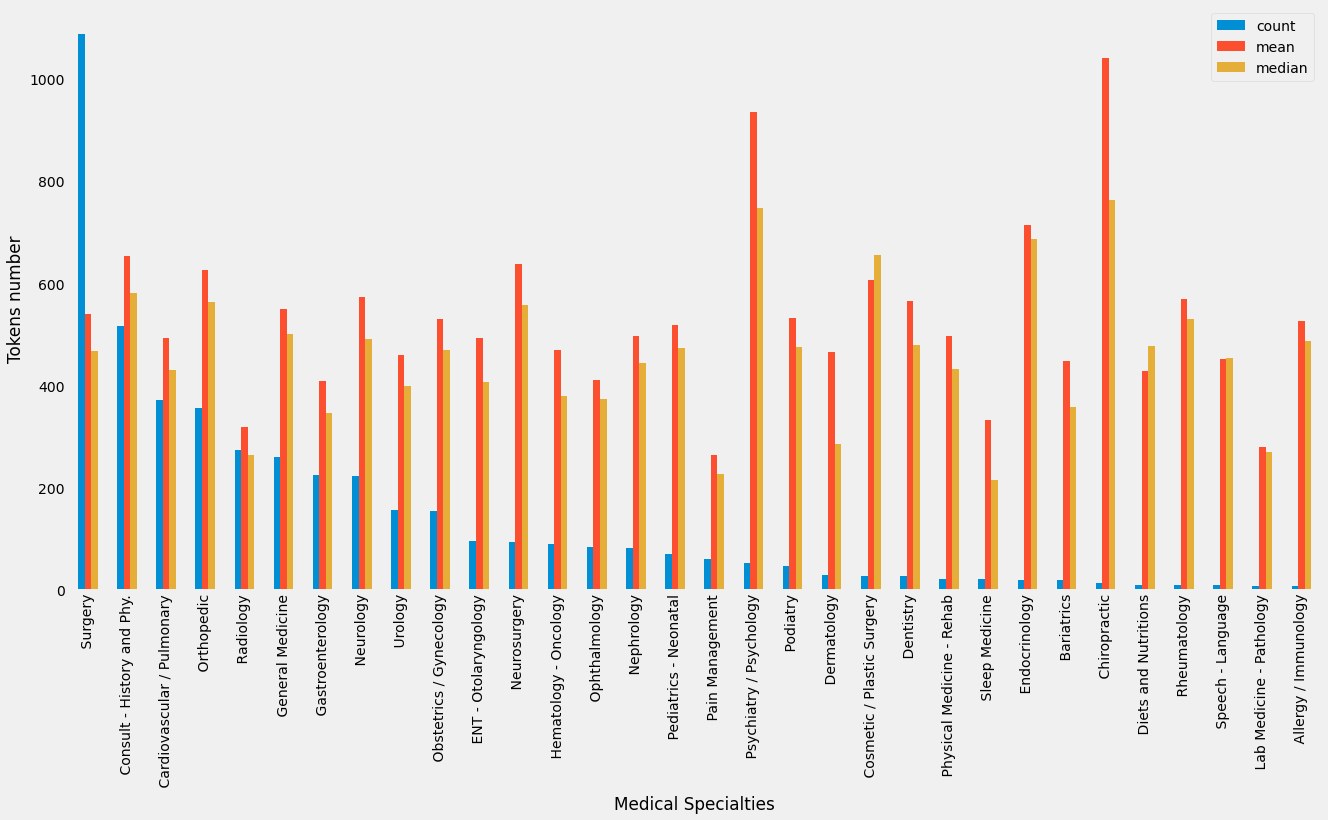

In [27]:
# A good snapshot: in our corpus there is a great number of texts for Surgery, but for practices like Psychiatry and 
#Immunology very few. Nonetheless, mean and median of tokes are high for those categories, which means that the corpora
#are long
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Tokens number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)
plt.savefig('Corpus_view_with_tokens_number')

In [28]:
#Decided to group some categories in sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
# # Combining similar offenses together
data = data.replace({' Sleep Medicine': " Sleep and Pain", ' Pain Management': " Sleep and Pain"})
data

,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"['subjective', 'this', '23-year-old', 'white',...","[subjective, 23-year-old, white, female, prese...",239
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...","[2-d, m-mode, ,, left, atrial, enlargement, le...",80
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[left, ventricular, cavity, size, wall, thickn...",243
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [29]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' Sleep and Pain', ' Rheumatology', ' Radiology',
       ' Psychiatry / Psychology', ' Podiatry',
       ' Physical Medicine - Rehab', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Lab Medicine - Pathology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Endocrinology', ' Diets and Nutritions',
       ' Dermatology', ' Cosmetic / Plastic Surgery',
       ' Consult - History and Phy.', ' Chiropractic'], dtype=object)

In [30]:
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 Psychiatry / Psychology         53
 Podiatry                        47
 Dermatology                     29
 Dentistry                       27
 Cosmetic / Plastic Surgery      27
 Physical Medicine - Rehab       21
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Rheumatology                    10
 Diets and Nutritions       

In [31]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' Sleep and Pain', ' Rheumatology', ' Radiology',
       ' Psychiatry / Psychology', ' Podiatry',
       ' Physical Medicine - Rehab', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Lab Medicine - Pathology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Endocrinology', ' Diets and Nutritions',
       ' Dermatology', ' Cosmetic / Plastic Surgery',
       ' Consult - History and Phy.', ' Chiropractic'], dtype=object)

In [32]:
# # Combining similar offenses together
#Group sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
data = data.replace({' Cosmetic / Plastic Surgery': " SKIN cosmetics", ' Dermatology': " SKIN cosmetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Dentistry                       27
 Physical Medicine - Rehab       21
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Rheumatology                    10
 Diets and Nutritions            10
 Speech - Language          

In [33]:
data = data.replace({' Chiropractic': " Physical Therapy", ' Physical Medicine - Rehab': " Physical Therapy"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dentistry                       27
 Endocrinology                   19
 Bariatrics                      18
 Rheumatology                    10
 Diets and Nutritions            10
 Speech - Language                9
 Lab Medicine - Pathology   

In [34]:
data = data.replace({' Bariatrics': " Dietetics", ' Diets and Nutritions': " Dietetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology       

In [35]:
data = data.replace({' Neurology': " Neurologists", ' Neurosurgery': " Neurologists"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Neurologists                   317
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology             7
Name: medical_specialty, dty

In [36]:
# Final count of medical specialties (for now)
data = data.replace({' Lab Medicine - Pathology': " Pathology"})
data['medical_specialty'].nunique()

27

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4514 non-null   object
 1   medical_specialty  4514 non-null   object
 2   sample_name        4514 non-null   object
 3   transcription      4514 non-null   object
 4   tokenized_sents    4514 non-null   object
 5   post_stopwords     4514 non-null   object
 6   tokens             4514 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 442.1+ KB


In [38]:
#Setting a cutoff lowerbound (250 tokens) and upperbound (1000) for the number of tokens
data= data[(data['tokens'] >= 250) & (data['tokens'] <= 1000)]
print(data['tokens'].min())
print(data['tokens'].max())

250
1000


In [39]:
data['medical_specialty'].nunique()

27

In [40]:
data['medical_specialty'].value_counts()

 Surgery                       786
 Consult - History and Phy.    403
 Orthopedic                    250
 Cardiovascular / Pulmonary    239
 Neurologists                  227
 General Medicine              202
 Gastroenterology              146
 Radiology                     139
 Obstetrics / Gynecology       111
 Urology                       104
 ENT - Otolaryngology           67
 Hematology - Oncology          62
 Ophthalmology                  61
 Pediatrics - Neonatal          59
 Nephrology                     57
 SKIN cosmetics                 44
 Sleep and Pain                 33
 Psychiatry / Psychology        31
 Podiatry                       28
 Dentistry                      26
 Dietetics                      22
 Physical Therapy               22
 Endocrinology                  15
 Rheumatology                    9
 Speech - Language               7
 Pathology                       5
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [41]:
data['medical_specialty'].value_counts()

 Surgery                       786
 Consult - History and Phy.    403
 Orthopedic                    250
 Cardiovascular / Pulmonary    239
 Neurologists                  227
 General Medicine              202
 Gastroenterology              146
 Radiology                     139
 Obstetrics / Gynecology       111
 Urology                       104
 ENT - Otolaryngology           67
 Hematology - Oncology          62
 Ophthalmology                  61
 Pediatrics - Neonatal          59
 Nephrology                     57
 SKIN cosmetics                 44
 Sleep and Pain                 33
 Psychiatry / Psychology        31
 Podiatry                       28
 Dentistry                      26
 Dietetics                      22
 Physical Therapy               22
 Endocrinology                  15
 Rheumatology                    9
 Speech - Language               7
 Pathology                       5
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [42]:
print(data['tokens'].min())
print(data['tokens'].max())

250
1000


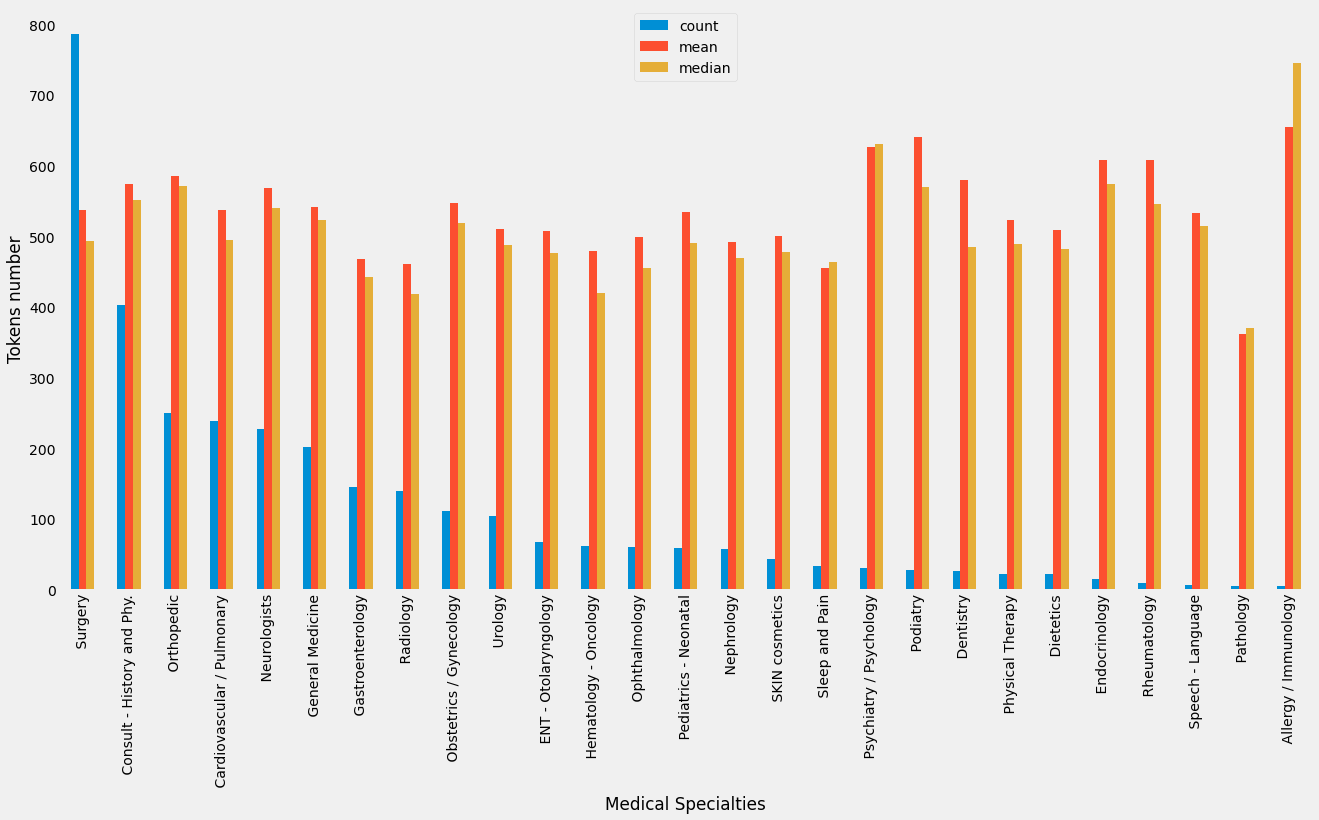

In [43]:
# Cleaned snapshot
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Tokens number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)
plt.savefig('Corpus_view_with_tokens_count')

In [44]:
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,786,537.576336,493.0
Consult - History and Phy.,403,574.253102,552.0
Orthopedic,250,585.252000,571.0
Cardiovascular / Pulmonary,239,537.619247,495.0
Neurologists,227,568.378855,540.0
General Medicine,202,541.148515,522.5
Gastroenterology,146,468.068493,442.5
Radiology,139,460.906475,418.0
Obstetrics / Gynecology,111,547.648649,519.0


In [45]:
del data['sample_name']

In [46]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,post_stopwords,tokens
3608,CT Abdomen & Pelvis W&WO Contrast,Gastroenterology,"exam ct abdomen & pelvis w&wo contrast, ,reas...","['exam', 'ct', 'abdomen', '&', 'pelvis', 'w', ...","[exam, ct, abdomen, &, pelvis, w, &, wo, contr...",362
2895,The patient with longstanding bilateral arm p...,Neurologists,history the patient is a 52-year-old right-han...,"['history', 'the', 'patient', 'is', 'a', '52-y...","[history, patient, 52-year-old, right-handed, ...",339
2596,"Hysteroscopy, Essure, tubal occlusion, and Th...",Obstetrics / Gynecology,"preoperative dx menorrhagia, desires permanent...","['preoperative', 'dx', 'menorrhagia', ',', 'de...","[preoperative, dx, menorrhagia, ,, desires, pe...",488
3193,Patient seen in Neuro-Oncology Clinic because...,Hematology - Oncology,"xyz,re: abc,medical record: 123,dear dr. xyz...","['xyz', ',', 're', ':', 'abc', ',', 'medical',...","[xyz, ,, :, abc, ,, medical, record, :, 123, ,...",599
3126,Excision of right superior parathyroid adenom...,Hematology - Oncology,preoperative diagnosis right superior parathy...,"['preoperative', 'diagnosis', 'right', 'superi...","[preoperative, diagnosis, right, superior, par...",543


In [47]:
data.shape

(3160, 6)

In [48]:
from collections import Counter
dictionary= data["post_stopwords"].transform(lambda x: Counter(x)).sum()
dictionary

Counter({'past': 1709,
         'medical': 1372,
         'history': 6275,
         'difficulty': 799,
         'climbing': 11,
         'stairs': 36,
         ',': 102521,
         'airline': 4,
         'seats': 4,
         'tying': 28,
         'shoes': 10,
         'used': 2361,
         'public': 13,
         'seating': 7,
         'lifting': 52,
         'objects': 49,
         'floor': 170,
         '.': 82712,
         'exercises': 43,
         'three': 639,
         'times': 454,
         'week': 497,
         'home': 677,
         'cardio': 11,
         'walking': 144,
         'two': 1423,
         'blocks': 17,
         'five': 216,
         'flights': 2,
         'snoring': 43,
         'muscle': 959,
         'joint': 750,
         'pains': 49,
         'including': 684,
         'knee': 721,
         'pain': 3156,
         'back': 1587,
         'foot': 586,
         'ankle': 378,
         'swelling': 398,
         'gastroesophageal': 90,
         'reflux': 155,
        

In [49]:
for k in sorted(dictionary, key=dictionary.get, reverse=True):
    print(k, dictionary[k])


, 102521
. 82712
patient 15931
: 13041
left 7483
right 7341
history 6275
procedure 5259
placed 4996
normal 4197
well 3802
pain 3156
using 2792
anesthesia 2740
skin 2683
incision 2608
performed 2557
removed 2531
blood 2493
also 2487
room 2479
noted 2463
used 2361
without 2340
's 2306
time 2258
diagnosis 2176
anterior 2034
taken 1995
) 1969
artery 1929
mg 1904
( 1854
position 1845
general 1816
past 1709
fashion 1702
closed 1689
operating 1649
chest 1646
area 1641
postoperative 1636
made 1616
upper 1602
back 1587
lower 1571
preoperative 1557
posterior 1519
2 1486
vicryl 1480
1 1480
good 1478
neck 1464
lateral 1458
sterile 1457
x 1449
abdomen 1447
present 1441
pressure 1436
approximately 1432
two 1423
tissue 1397
surgery 1392
one 1377
medical 1372
given 1355
obtained 1352
medications 1345
prepped 1339
suture 1331
disease 1322
significant 1308
draped 1302
cm 1281
dr. 1280
heart 1271
complications 1241
loss 1232
small 1232
denies 1227
clear 1227
examination 1226
catheter 1223
stable 1221
dis

tibial 190
regarding 189
biopsies 189
b.i.d. 189
report 189
capsular 189
ventricle 189
day. 188
resected 188
red 188
stroke 187
allergic 187
six 187
deformity 187
apparently 187
allowed 187
involving 187
pounds 186
device 186
married 186
rotator 186
extension 186
shunt 186
systolic 185
superficial 185
actually 185
nodes 185
modified 185
cyst 184
lymphadenopathy 183
examined 183
towards 183
plane 182
straight 182
section 182
stated 182
measuring 182
0.5 182
tone 182
sign 181
us 181
exposure 181
daughter 181
movement 180
rule 180
specimens 179
intravenous 179
cultures 179
answered 178
extensive 178
exposed 178
proceeded 178
scheduled 178
details 178
arteries 178
staples 178
workup 177
issues 177
fluoroscopic 177
breathing 177
infant 177
gastric 176
view 176
myocardial 176
grade 175
iliac 175
c 175
increase 175
marginal 175
fifth 175
edema. 174
improvement 174
became 174
show 174
longus 174
dura 174
syndrome. 174
scar 173
cbc 173
inferiorly 173
knife 173
seizure 173
use. 173
guide 173
art

apnea 99
ulcer 99
hepatitis 99
leak 99
profile 99
elected 99
transplant 99
onto 99
insufflated 99
appetite 99
never 99
coming 99
instilled 99
result 99
wires 99
advised 99
tibia 99
dominant 99
nipple 99
t2 99
cecum 99
lv 99
prednisone 99
sister 99
drinks 98
padded 98
create 98
illicit 98
name 98
ischemic 98
nonsmoker 98
moderately 98
trauma 98
camera 98
requested 98
surgeries 98
ice 98
groove 98
interspace 98
dvt 97
gives 97
impacted 97
laryngeal 97
already 97
identification 97
placing 97
9on 97
dialysis 97
tablet 97
coronal 97
failure. 97
labor 97
evening 97
volar 97
ovarian 97
cesarean 97
l4-l5 97
limb 96
exploration 96
thoracic 96
recurrence 96
attempt 96
scrotum 96
instruments 96
wanted 96
boy 96
__________ 96
prep 96
complained 96
atrium 96
sustained 96
reflex 96
school 96
neural 96
c6-c7 96
conscious 95
lamina 95
behind 95
breasts 95
minutes. 95
laparoscope 95
deflated 95
femur 95
toes 95
spondylosis 95
includes 94
dysfunction 94
organomegaly 94
beginning 94
require 94
gas 94
ten

move 64
4-french 64
kg 64
thoracotomy 64
leaving 64
gradually 64
hepatosplenomegaly 64
systemic 64
trocars 64
exchanged 64
biliary 64
unclear 64
density 64
rheumatoid 63
thrombosis 63
egd 63
dermabond 63
complication 63
meticulous 63
medium 63
15-blade 63
recheck 63
soon 63
lymphadenopathy. 63
percussion 63
tenderness. 63
kept 63
platelets 63
severity 63
medicine 63
axilla 63
treat 63
anything 63
bursa 63
interpretation 63
subperiosteal 63
recall 63
cns 63
waves 63
fragment 63
rca 63
seeing 63
neurology 63
c5-c6. 63
insufflation 62
ros 62
pieces 62
pursestring 62
spread 62
notable 62
rise 62
extra 62
entering 62
allergy 62
healing 62
cosmetic 62
cul-de-sac 62
meal 62
snare 62
sternocleidomastoid 62
arthroscopy 62
shoulder. 62
occipital 62
ductus 62
vehicle 62
evoked 62
unknown. 62
describes 62
causes 61
dense 61
tumor. 61
looked 61
damage 61
swollen 61
differential 61
okay 61
xii 61
retired 61
team 61
notch 61
gastrostomy 61
inpatient 61
anemia. 61
cephalic 61
contour 61
experiencing 6

rehabilitation 43
testicular 43
incising 43
higher 43
sick 43
blake 43
collecting 43
vertigo 43
placed. 43
carcinoma. 43
subcutaneously 43
buttocks 43
aforementioned 43
53-year-old 43
addressed 43
inability 43
managed 43
muscular 43
adnexa 43
thorough 43
individual 43
autograft 43
progression 43
ligamentum 43
attending 43
v 43
anal 43
beats 43
patients 43
cholecystectomy. 43
radiology 43
penetration 43
ventriculogram 43
excluded 43
tia 43
delusions 43
fever. 43
drinking 42
abdomen. 42
concerning 42
papillary 42
dartos 42
etc. 42
stump 42
0.4 42
diabetes. 42
various 42
totally 42
undergoing 42
stop 42
shot 42
habits 42
throughout. 42
easy 42
bacterial 42
retract 42
knows 42
applied. 42
symphysis 42
undersurface 42
rare 42
spells 42
irritation 42
helped 42
evacuation 42
judgment 42
ball 42
exploratory 42
pressure. 42
sounded 42
tones 42
variable 42
handed 42
anteverted 42
pillar 42
original 42
mobility 42
technique. 42
level. 42
carina 42
stability 42
wrap 42
patellofemoral 42
paralysis 

0-vicryl 32
continuation 32
goes 32
brothers 32
samples 32
absence 32
counseled 32
volts 32
injury. 32
machine 32
adenoids 32
monitors 32
maintenance 32
variety 32
adjusted 32
width 32
sclerotic 32
wax 32
hoarseness 32
stimulated 32
runoff 32
expansion 32
ribs 32
outflow 32
basilic 32
keeping 32
passive 32
piriform 32
good. 32
mayfield 32
concentric 32
amniotic 32
galea 32
autologous 32
temporally 32
columella 32
one-third 32
tendinosis 32
seek 32
5-french 32
oozing 32
comminuted 32
tortuous 32
ratio 32
benadryl 32
restored 32
tolerance 32
ray 32
fcr 32
medically 32
duplex 32
jl4 32
ostial 32
atmospheres 32
bases 32
arrived 32
cad 32
retroflexed 32
gastritis 32
comparison 32
angiogram. 32
arteriotomy 32
inversion 32
naming 32
stating 32
teaspoon 32
2pounds 32
guaiac 32
papilledema 32
cycles 32
tetanus 32
tanner 32
servings 32
pancreatitis 31
fast 31
impression/plan 31
endocatch 31
2000 31
prophylactic 31
17-year-old 31
ambulatory 31
local. 31
grams 31
surgeries. 31
study. 31
deeper 31


nonreassuring 25
hemorrhage. 25
atrophy. 25
2and 25
iv. 25
inhibitor 25
erosions 25
c3 25
photophobia 25
z 25
ppd 25
hypokalemia 25
calcaneocuboid 25
driver 25
dementia. 25
n't 25
psychosis 25
80. 25
sclerosis 25
lasted 25
titers 25
zoloft 25
say 25
noncontrast 25
diverticulitis 25
malaise 25
mm/dd/yyyy 25
breakfast 25
30-year-old 24
dorsi 24
confused 24
intraoral 24
ercp 24
tubing 24
advance 24
q.4h 24
subdartos 24
seminal 24
pubis 24
lymphadenectomy 24
nutritional 24
1pounds. 24
insert 24
noncontributory 24
measure 24
resolving 24
makes 24
reasons 24
0.6 24
impedance 24
accommodate 24
weekly 24
2008 24
reducing 24
preperitoneal 24
finger. 24
scored 24
attenuated 24
pockets 24
telfa 24
sulfa. 24
alcoholic 24
disability 24
nephrectomy 24
lysed 24
serially 24
43-year-old 24
anxious 24
needing 24
premarin 24
weekend 24
gel 24
pectoral 24
sclera 24
perforated 24
hysterectomy. 24
decelerations 24
digitally 24
downward 24
hemodynamically 24
sets 24
healon 24
gloves 24
same. 24
places 24
nut

vegetables 20
xopenex 20
magnesium 20
g-csf 20
urological 20
integumentary 20
levothyroxine 20
hematologic/lymphatic 20
ems 20
calorie 20
meningitis 19
crestor 19
pitting 19
15-mm 19
periumbilical 19
abd 19
rarely 19
titer 19
pulses. 19
intestine 19
cholelithiasis 19
trach 19
specimen. 19
discussed. 19
clothes 19
vulva 19
occasions 19
lethargy 19
dissection. 19
bookwalter 19
middle-aged 19
erectile 19
itchy 19
usage 19
afrin 19
oxycodone 19
aside 19
genital 19
bronchitis. 19
detrol 19
internally 19
reconstructed 19
immune 19
must 19
heal 19
16-year-old 19
wheeled 19
psoas 19
gm 19
bulge 19
uneventful 19
turning 19
historian 19
transmitted 19
ground 19
tremors 19
oncologist 19
shockwave 19
incision. 19
reexamined 19
enhance 19
x3. 19
situ 19
nephropathy 19
varices 19
restart 19
largest 19
minimum 19
people 19
referring 19
16-mm 19
staying 19
soap 19
irrigating 19
examine 19
combined 19
band-aid 19
impaction 19
recalled 19
till 19
weaned 19
monopolar 19
tracking 19
wet-field 19
reamed 19

sprain. 16
apophyseal 16
distention. 16
6mg 16
sons 16
warfarin 16
euthymic 16
likelihood 16
kcl 16
lica 16
hctz 16
wnl 16
embolism. 16
travel 16
simulation 16
graves 16
phenobarbital 16
attend 16
status. 16
dinner 16
2001 16
osteoporosis. 16
importance 16
2+. 16
paxil 16
visit. 16
exercising 16
nonerythematous 16
click 16
carboplatin 16
6blood 16
10.hematocrit 16
tall 16
protuberant 16
chemistry 16
nonsmoker. 16
eoms 16
examgeneral 16
work. 16
trileptal 16
simvastatin 16
prn 16
asbestos 16
bnp 16
stomatitis 16
everyday 15
gerd 15
curve 15
flank. 15
aroused 15
lactated 15
vasculitis 15
shiley 15
outline 15
interim 15
harvesting 15
tracts 15
3-cm 15
three-way 15
stooling 15
pre 15
encompassing 15
arousable 15
nondistended. 15
assure 15
pill 15
hemoptysis. 15
localizing 15
mm. 15
glidewire 15
nodularity 15
bump 15
midportion 15
asymptomatic 15
made. 15
joseph 15
approximating 15
two-thirds 15
toldt 15
electro 15
surgeon. 15
fascitis 15
lacrimal 15
rotate 15
appropriately. 15
pepcid 15
cl

thereby 12
security 12
lipodystrophy 12
undermining 12
flattened 12
specified 12
collaterals 12
flashes 12
follicle 12
900 12
pretracheal 12
humulin 12
proventil 12
bypass. 12
pca 12
med 12
flomax. 12
meet 12
dry. 12
cautery. 12
tacking 12
retropubic 12
fascia. 12
ligatures 12
extravasation 12
16-french 12
19for 12
soreness 12
pyeloplasty. 12
mobilizing 12
pyelotomy 12
pyelogram 12
2-1/2-year-old 12
circumcised 12
inspection. 12
discussions 12
harm 12
sensitivities 12
miralax 12
10-year-old 12
cremasteric 12
plain. 12
intended 12
tucked 12
stream 12
rectocele 12
found. 12
dressing. 12
morbidity 12
severed 12
involve 12
corpora 12
adding 12
turbid 12
instillations 12
dilation. 12
glanular 12
chordee. 12
hood 12
surveillance 12
uti. 12
seed 12
father. 12
beverages 12
obstructed 12
5. 12
cystoscopy. 12
2003 12
riding 12
injection. 12
string 12
tuberculin 12
pull-back 12
rid 12
bell 12
burden 12
decide 12
raises 12
hydrocodone 12
osteomed 12
deflation 12
watching 12
freshened 12
transpedic

dysplasia 10
aca 10
distinct 10
ob/gyn 10
2002. 10
socially 10
sibling 10
dd 10
yyyy 10
thirds 10
grasping 10
picked 10
0.2 10
urologist 10
turbt 10
hyperplasia. 10
retrieved 10
trabeculations 10
school. 10
dysplastic 10
exophytic 10
efflux 10
hypermobility 10
foley. 10
previously. 10
transfusion. 10
beers 10
19. 10
pelvis. 10
stones. 10
diverticuli 10
calculus 10
rising 10
skeletal 10
meaning 10
testicles 10
crushed 10
lisinopril. 10
gangrene 10
hydroceles. 10
orchiopexy. 10
ensuring 10
steri-strip 10
anticholinergics 10
10-french 10
stretch 10
connecting 10
defibrillator 10
cystopyelogram 10
7-year-old 10
lord 10
roof 10
unexpected 10
fungating 10
wart 10
18-french 10
tuck 10
probes 10
degloved 10
warmth 10
indigestion 10
somewhere 10
inherent 10
numbness. 10
timing 10
lt 10
pseudomonas 10
well-healed 10
circular 10
2.1 10
situ. 10
cystitis 10
systematic 10
breaking 10
pole. 10
mom. 10
cells. 10
recurrence. 10
claudication 10
bioarc 10
injectables 10
fenestrated 10
induce 10
adrenale

navicula 9
osteochondromas 9
hereditary 9
obliquely 9
mallet 9
concluded 9
ipsilateral 9
paraspinous 9
6-week 9
rinse 9
taken. 9
bench 9
magna 9
cranioplasty 9
microbiology. 9
gastrotomy 9
restenosis 9
edc 9
spotting 9
teflon 9
contoured 9
allograft. 9
q.4-6h 9
sinus. 9
destruction 9
necessary. 9
1blade 9
20s 9
quantity 9
arrested 9
cold-blood 9
charge 9
face. 9
blepharoplasty. 9
marginalis 9
rhytidectomy 9
plication 9
moisture 9
fibrin 9
dystrophy 9
tipped 9
avoiding 9
septum. 9
sewed 9
mastectomy. 9
abdominus 9
handled 9
peeled 9
unstable 9
pmt 9
brows 9
tilted 9
staged 9
blinking 9
manipulate 9
concurrent 9
press 9
accumulation 9
antibiotic-impregnated 9
angulation 9
sciatic 9
8.0 9
casts 9
checking 9
blisters 9
elongated 9
asymmetry. 9
immunosuppression 9
acquisition 9
gonadal 9
debridement. 9
buster 9
elastoplast 9
endotine 9
pad. 9
country 9
gingivobuccal 9
obliterated 9
32-french 9
decannulated 9
celsius 9
intradermal 9
associates 9
record. 9
radiolucent 9
curet 9
neuroforaminal

densely 8
sounding 8
9.5 8
moistened 8
colored 8
melanoma. 8
save 8
headholder 8
book 8
ventriculogram. 8
complication. 8
flow. 8
mesentry 8
branches. 8
however. 8
guiding 8
voyager 8
plaquing 8
timi 8
pda. 8
midway 8
ectasia 8
evidenced 8
xmm 8
9stenosis 8
manifold 8
om1 8
crumbly 8
retrosternal 8
avf 8
hyperpigmented 8
ensued 8
ppi 8
striking 8
esophagitis. 8
periapical 8
tubular 8
fluoride 8
pulp 8
unit. 8
ecchymotic 8
spray. 8
gy 8
backflow 8
lingula 8
punctate 8
wedged 8
quantitative 8
ecchymosis. 8
paralytic 8
omniflush 8
cavitary 8
instability. 8
neoplasm. 8
dyspepsia. 8
coursed 8
cetacaine 8
department. 8
stigmata 8
bursts 8
16 8
glabrous 8
combative 8
premedications 8
ethmoiditis. 8
antrostomy 8
back-biting 8
longest 8
gastrojejunal 8
dysmetria 8
astrocytoma 8
visitation 8
pared 8
15-year-old 8
defibrillation 8
abcd1234. 8
occlusal 8
panalok 8
tag 8
first-degree 8
subluxation. 8
pollack 8
formalin 8
corticectomy 8
burs 8
supplement 8
intraparenchymal 8
boss 8
sometime 8
worst 

mouth. 7
anytime 7
graduated 7
cracker 7
nectar-thick 7
hyolaryngeal 7
coordinated 7
warned 7
lotensin 7
1weight 7
sao2 7
card 7
94 7
gamma 7
stomachache 7
wrists 7
immunosuppressive 7
inflammation. 7
grandmother. 7
1lbs 7
otoscopic 7
kid 7
perrla. 7
acyclovir 7
atrovent. 7
mobic 7
0.0 7
tee 7
sq 7
also. 7
suv 7
spiculated 7
ae 7
t3-4 7
junctional 7
soles 7
hamstrings 7
h20 7
axonal 7
nap 7
300mg 7
bid. 7
bue. 7
protocols 7
bound 7
13.hct 7
1980 7
uncomfortable. 7
1which 7
findingsnormal 7
brainstem-cervical 7
ectopia 7
craniovertebral 7
atlantoaxial 7
6mm 7
c4-there 7
c5-there 7
c6-there 7
impressionmultilevel 7
phenomena 7
lhm 7
ino 7
tw. 7
vit 7
parieto-occipital 7
e.g 7
1-3 7
sparse 7
scotoma 7
consuming 7
business 7
10mg 7
malignancies 7
voices 7
hemianopsia 7
vasotec 7
2.5cm 7
phenomenon. 7
fibromyalgia 7
authorization 7
deltoids 7
4+/5 7
prefer 7
contains 7
faxed 7
mri. 7
effects. 7
assessed. 7
sinusitis. 7
convulsion 7
adhd 7
addiction 7
offer 7
m.d. 7
pharmacy 7
attitude 7
beh

l4-5. 6
instrumented 6
capstone 6
llland 6
nuts 6
08/28/0 6
end-tidal 6
cleansing 6
microtechniques. 6
decompressive 6
ahead. 6
running-locking 6
duraseal 6
4/7th 6
breach 6
interceed 6
overlapped 6
2700 6
banded 6
simplex 6
foreseeable 6
descend 6
myometrium 6
abg 6
0-chromic 6
amnioinfusion 6
facts 6
induction. 6
fiberglass 6
3cc 6
tumescent 6
carpometacarpal 6
trapezium 6
mcp 6
insulated 6
rechecking 6
postoperatively. 6
myomectomy. 6
adiposity 6
intentional 6
allen-masters 6
appendix. 6
persistence 6
koh 6
colpotomy 6
bloating 6
cystectomy 6
0.2bupivacaine 6
cholangiocatheter 6
subphrenic 6
peanut 6
dyskinesia. 6
bowel. 6
non-cutting 6
tertiary 6
spondylolysis. 6
laminotomies 6
am8 6
corticated 6
unique 6
interspinous 6
tuohy 6
unsafe 6
t7 6
subarticular 6
meniscoplasty. 6
unicompartmental 6
osteoarthritic 6
mixing 6
smith 6
debilitating 6
bmp. 6
l5-scollapsed 6
rasps 6
exostosis 6
gastroc 6
reestablished 6
preretinal 6
16.0 6
keratoprosthesis 6
icd-9 6
malunion 6
ball-tip 6
11.5 6

deposits 6
diapers 6
97.5 6
laryngotracheoplasty 6
peho 6
diaper. 6
gastroenteritis. 6
30.and 6
pertussis 6
aldex 6
facemask 6
atraumatic. 6
not. 6
injected. 6
heavier 6
30-minute 6
migraines. 6
long-acting 6
ambulation. 6
persist 6
comfortable. 6
hearing. 6
work-up 6
zanaflex 6
2lbs 6
cafe 6
au 6
lait 6
stance 6
remarkable. 6
abcd. 6
relating 6
iliopsoas 6
homans 6
9.hematocrit 6
sciatica 6
metacarpals 6
ot 6
player 6
ortho-glass 6
elevates 6
rhinocort. 6
cognition 6
05/02/06 6
tuberculosis 6
neovascularization 6
gonioscopy 6
pinholing 6
irides 6
thinner 6
xalatan 6
neuropsychiatric 6
examinationvitals 6
0.0mg 6
undetermined 6
metronidazole 6
vegetable 6
eczematous 6
dermatitis. 6
intolerance. 6
subclinical 6
19th 6
figure 6
cisplatin 6
3-day 6
tympany 6
pam 6
cuing 6
problems/diagnoses 6
surprise 6
antiplatelet 6
polypharmacy 6
periodically 6
hoping 6
toxicology 6
latest 6
emg/nerve 6
ammonia 6
tranxene 6
quivering 6
pulseless 6
molecular 6
avandia 6
ecchymoses 6
literature 6
shrug 6

combivent 5
guaifenesin 5
investigate 5
claim 5
gastroc-soleus 5
deceased. 5
tennis 5
principal 5
dislocations 5
tender. 5
5/5. 5
dermatomes 5
unspecified. 5
amnestic 5
diclofenac 5
keflex. 5
xin 5
hyperglycemia. 5
patanol 5
138/8pulse 5
avoids 5
7mg 5
squeezing 5
anticipate 5
20/200 5
abc. 5
color. 5
sinai 5
folliculitis. 5
20/on 5
cause. 5
heaviness 5
nicking 5
stressful 5
6respirations 5
mucositis 5
eclampsia 5
disturbances. 5
transformation 5
reevaluation. 5
pms 5
arms. 5
sonogram 5
fund 5
exceeding 5
embolic 5
ringing 5
senior 5
spasticity 5
up. 5
epilepsy. 5
h.s 5
dyazide 5
sits 5
rhinocort 5
awas 5
fluticasone 5
miles 5
decongestant 5
1991. 5
ct. 5
0.calcium 5
indices 5
francisco 5
television 5
eating. 5
cardboard 5
cocaine. 5
fullness. 5
mastectomies 5
cyclosporine 5
concerns. 5
80/12.5 5
ill-defined 5
peptide 5
demanding 5
2009 5
1white 5
mononucleosis 5
counts. 5
tomorrow. 5
epstein-barr 5
hydration. 5
myeloproliferative 5
contraindicated 5
roxanol 5
ekgs 5
of. 5
splenectomy 

altrua 4
asystole 4
re-access 4
vvi 4
noticed. 4
historythis 4
implantedmedtronic 4
123in 4
12345. 4
sidearm 4
17.5 4
extraarticular. 4
micronail 4
osteosynthesis 4
flexion-extension 4
acumed 4
placements 4
kantrex 4
column/transverse 4
tenotomized 4
malleable 4
enabling 4
7-hole 4
interfragmentary 4
hinged 4
incarceration 4
traveled 4
malleolus. 4
translated 4
tongues 4
translaminar 4
caudad-cephalad 4
20-degree 4
perceivable 4
802.3and 4
802.36. 4
interpersonal 4
maxillofacial 4
24-gauge 4
malocclusion 4
interdental 4
elastics 4
tibia. 4
6.mm 4
jump 4
avulsed 4
mobilizer 4
four-part 4
trifurcation 4
short-arm 4
frykman 4
calendar 4
ladder 4
fluffy 4
liss 4
notch. 4
slid 4
13-hole 4
a-hole 4
actions 4
leukemic 4
meningitis. 4
0.2plain 4
guarantee 4
irrigation. 4
q.4-6 4
recuperative 4
acalculous 4
08/07/2003 4
hida 4
detailing 4
52-french 4
gastrohepatic 4
phrenoesophageal 4
visualizing 4
antireflux 4
silo 4
screw-type 4
atlas 4
spared 4
morton 4
needle-localized 4
fibrocystic 4
twelf

wore 4
command 4
paraphasias 4
gestures 4
struggle 4
enterocele. 4
enterocele 4
10/24/08 4
01/05/0 4
executive 4
subtests 4
recalling 4
cancellation 4
mazes 4
administered. 4
perceptual 4
listen 4
buildup 4
activation 4
apneas 4
12.7 4
susceptible 4
automobile 4
daytime. 4
refreshed 4
awakens 4
smart 4
downloading 4
airflow 4
technology 4
86 4
multiplex 4
contin 4
153/8pulse 4
6of 4
2minutes 4
non-rem 4
fluctuated 4
82 4
sleep-disordered 4
hypoventilation 4
cluster 4
acts 4
automated 4
patterns. 4
diffusion 4
mornings 4
lists 4
detect 4
helpful. 4
amoxicillin-clavulanate 4
1mg-31.mg 4
chewable 4
adrenocot 4
1989. 4
complainer 4
canker 4
easton 4
mules 4
deer 4
limitation. 4
2height 4
118.1 4
22.1 4
61/44. 4
arava 4
130/70 4
dmard 4
victoria 4
bedtime.,1 4
scales 4
excoriations 4
ulcerations. 4
acanthosis 4
nigricans 4
shapes 4
shingles 4
reclining 4
1.normal 4
myositis 4
neuropathic 4
hormone. 4
94. 4
minus/plus 4
36weeks 4
4days 4
34.6cm 4
40weeks 4
37weeks 4
4days. 4
3289grams 4
7pou

sluggishly 4
concur 4
recollection 4
cabinet 4
600s 4
lovaza 4
shepherd 4
polio 4
ucsf 4
kilo 4
update 4
25-pound 4
62. 4
8temperature 4
dysphasia 4
temporal/sphenoid 4
regrowth 4
tentorial 4
meningiomas 4
19she 4
'92 4
analgesics. 4
systemsros 4
examexam 4
evolved 4
stood 4
tft 4
spep 4
shaky 4
01/01/0 4
edition 4
multiplied 4
spiriva 4
emt 4
catherization 4
prn. 4
medsnone 4
lle. 4
prbcs 4
5/proximally 4
responsive. 4
baclofen 4
slender 4
impersistence 4
manifestations 4
140/70 4
note. 4
survived 4
binding 4
reattachment 4
half-brothers 4
cn6 4
assay 4
bitemporal 4
mononuclear 4
rr20 4
glioma. 4
atypia 4
miller-fisher 4
internist 4
antiretroviral 4
primidone 4
bradycardia. 4
exerted 4
blush 4
xrt. 4
assume 4
capsule. 4
13.hematocrit 4
3glucose 4
craniopharyngioma. 4
hopkins 4
carbatrol 4
remember. 4
confused. 4
98.0. 4
optimizing 4
9.00 4
antiinflammatories 4
mg/day 4
-25 4
myoglobin 4
terazosin 4
presume 4
antecedent 4
antimicrobials 4
tibc 4
medical/surgical 4
02/200 4
antiinflamma

6-post 3
unroofed 3
kerrisons 3
palpating 3
infuse 3
l4-ll5-s1 3
interfered 3
l4. 3
susing 3
pangea 3
clear-like 3
listhesed 3
listhesis 3
gearshift 3
undertapped 3
resounded 3
l5. 3
l5-sdiscectomy 3
l5-sright 3
down-biting 3
gp1 3
team. 3
cortices 3
lacerations. 3
shavers 3
squared 3
nurse. 3
walling 3
maybe 3
generously 3
stat. 3
kerlix. 3
readministered 3
alone. 3
magic 3
blood-tinged 3
cystotomy 3
cc6 3
midas-rex 3
re-establish 3
arteriogram. 3
echo. 3
consenting 3
planar 3
eponychium 3
gentamicin-impregnated 3
osteoset 3
tobramycin-impregnated 3
8-month-old 3
granuloma. 3
substantially 3
involuted 3
devastation 3
nonaccidental 3
tubeless 3
affixing 3
inhibitors. 3
tiva 3
electronics/robotics 3
metatarsals 3
xi-scan 3
triangulate 3
-shaped 3
orthowedge 3
08/22/2003 3
p.c. 3
heads. 3
flowed 3
pulse-evac 3
floss 3
tracking. 3
radiosurgical 3
obliterate 3
1.2-mm 3
uploaded 3
generate 3
8isodose 3
23.gy 3
2.9ml 3
79 3
approved. 3
1200the 3
dictating 3
ventillation. 3
pseudoaneurysms 3


encouragement 3
unemployed. 3
withdrawal. 3
97 3
tacrolimus 3
dynamics 3
commitment 3
caretaker 3
multiorgan 3
restoril 3
bisacodyl 3
suppository 3
substitute 3
mechanic 3
angry 3
2200which 3
cardura 3
suppositories 3
zestril 3
everyday. 3
abortive 3
recalls 3
19when 3
200her 3
visions 3
russian 3
historyher 3
celexa. 3
chemist 3
ménière 3
fitness 3
taho 3
nevada 3
killing 3
frightened 3
experimenting 3
lxv 3
responded. 3
antichrist 3
neighborhood 3
criticizing 3
anti-psychotics 3
bout. 3
lapse 3
houses 3
average. 3
structured 3
anti-psychotic 3
addresses 3
friendly 3
concussion. 3
sweaty 3
onychomycosis. 3
accutane. 3
athletic 3
fungus 3
damp 3
toes. 3
antifungal 3
toy 3
stopped. 3
reliance 3
elicits 3
ice. 3
slipping 3
laborer 3
05/05/03 3
05/06/0 3
azotemia 3
doxepin 3
zyloprim 3
aldactone. 3
doxepin. 3
tegretol. 3
synthroid.,1 3
1-story 3
pneumonia.,1 3
requiring.,1 3
near-independent 3
peri-colace 3
boxer 3
relatives 3
supervision. 3
dyscoordination 3
3-month-old 3
hib 3
helped. 3

subfascially 2
collodion 2
post-anesthetic 2
,2ml 2
crile 2
2200ua 2
5-9 2
07/24/2008 2
neuromodulator. 2
urodyanamcis 2
anticholinergic 2
slide 2
bellows 2
mini-laparotomy 2
cavermap. 2
constricture 2
phlebitis 2
etcetera. 2
20- 2
kitner 2
bundles. 2
stoma-like 2
re-evaluated 2
ligature. 2
epidermidis 2
pericapsular 2
hemiscrotum. 2
39,000. 2
disintegrated 2
nonabsorbable 2
ancef. 2
cleansed. 2
epididymis. 2
7-1/2-month-old 2
recognizable 2
tease 2
gubernaculum 2
nonexistent 2
calibrating 2
viability 2
reanastomosed 2
strengthened 2
smallest 2
foreskin. 2
re-peritonealized 2
re-approximating 2
direct. 2
bassini. 2
tevdek 2
q.1h 2
anti-cholinergic 2
tur 2
diode 2
side-firing 2
lasering 2
rutkow 2
reinforcing 2
formed. 2
push. 2
imbricated 2
myopectineal 2
monocril 2
indirect. 2
catching 2
thinness 2
aliquot 2
hernial 2
salvaging 2
recreate 2
fournier 2
phimotic 2
disfigurement 2
penectomy 2
pouring 2
,300 2
pen. 2
circumscribe 2
splaying 2
heineke-mikulicz 2
perpetual 2
tit 2
1-1/2-yea

5-1/2-year-old 2
09/13/2007 2
3.8-mm 2
la/ao 2
1.an 2
6/5 2
reconfigure 2
conical 2
basketball. 2
i-ii 2
strutted 2
don-joy 2
hypercalcemic 2
identity 2
hyperextend 2
9mg 2
purple 2
pre-excision 2
hyperparathyroidism 2
15-knife 2
11-knife 2
informationright 2
thresholdsright 2
9.7 2
33.0 2
2.6 2
ddd 2
re-accessing 2
oxygenating 2
reshaped 2
fragility 2
backup 2
header 2
altura 2
continuous. 2
31st 2
sinoatrial 2
1234medtronic 2
enrhythm 2
performanceatrial 2
10.impedance 2
855. 2
2-1/2-inch 2
back-bleeding 2
analyzer 2
impressionsuccessful 2
,1.2 2
abcd123456. 2
wright 2
drape. 2
0.0k-wire 2
inclination 2
prosupination 2
5-cm 2
accu-lock 2
variety. 2
langenbeck 2
internus 2
gemelli 2
column 2
infolded 2
definitively 2
montage 2
splint. 2
incap 2
6packed 2
,1600 2
2cubic 2
pedestrian 2
dirty 2
screw. 2
superiorly. 2
wrap. 2
bolted 2
curettes. 2
io 2
halstead 2
c1-cusing 2
c1-c3. 2
c1to 2
c3. 2
geta. 2
c1-c3 2
earlobes 2
cccas 2
trajectories 2
25-degree 2
masteries 2
lateral-to-medial 2


cath-based 2
jl5 2
videotapes 2
well-preserved 2
mid-to-distal 2
hemicolectomy. 2
proving 2
sparring 2
0-muscular 2
matching 2
cementation 2
morse 2
echocardiography. 2
163/0 2
ulcerated 2
excentric 2
terminating 2
non-flow 2
shell-like 2
1wire 2
116/with 2
111/with 2
110/67. 2
trileaflet 2
normal-caliber 2
hypokinesis. 2
modification. 2
scintigraphy 2
optiray 2
350. 2
17mgy. 2
155/mmhg 2
160/mmhg 2
ectatic 2
troponin-positive 2
reflow 2
0.0universal 2
2.x 2
9lesion. 2
triple-vessel 2
reopro/stent 2
realizing 2
fibrillating 2
bya 2
administration. 2
asian-american 2
jl4.0 2
8central 2
hypercontractility 2
overestimates 2
takasubo 2
intercoronary 2
re-cross 2
re-wire 2
xvision 2
femostop 2
deploying 2
subintimal 2
under-filled 2
gram. 2
calcified. 2
traverses 2
providence 2
agreeable. 2
aneurysmal 2
arteriographies 2
diagonal. 2
jl6-french 2
jr4. 2
zeta. 2
countershock 2
proximal. 2
intervene. 2
descending/diagonal 2
coronary. 2
20/1rv 2
26/ra 2
2.0hemoglobin 2
9.o2 2
37. 2
59/pulmonary

intima 2
post-absorptive 2
non-sedated 2
midsegment 2
re-stenosis 2
11111111120 2
22222222230 2
11111and 2
11120 2
222and 2
relocated 2
palately 2
2222230 2
luxated 2
1:100 2
1:200 2
000. 2
ragnell 2
chocolate/caffeine 2
synchronized 2
minimization 2
sotalol 2
weekend. 2
ptca/endeavor 2
6-french. 2
valium. 2
reopro. 2
,1ml. 2
xp 2
0.0bmw 2
redilated 2
nominal 2
endeavor 2
reinflated 2
plaquing. 2
4to 2
145/10left 2
147/1left 2
0this 2
1000. 2
installation 2
1seconds 2
step-down 2
mercury 2
posterobasal 2
4with 2
angio-seal. 2
progression. 2
0.0guide 2
108/4 2
1there 2
operates 2
om-2 2
1.5-mm 2
200overall 2
antihyperlipidemic 2
imperative 2
crushing-type 2
ml/second 2
successfully. 2
1mmhg. 2
angiogramthe 2
shot. 2
native. 2
thermodilution 2
transducer. 2
10/7 2
37/10/4 2
31/14/mmhg 2
angiographs 2
langston 2
kenneth 2
fang 2
repair/replacement 2
impressionmoderate 2
measurement. 2
91/6the 2
94/with 2
2left 2
om-3 2
om-4 2
plom 2
circ 2
salvage 2
8400 2
3ml 2
bisulphate 2
0.1mcg/kg/min

librium 2
12/1/9neuropsychological 2
11/25/revealed 2
copying 2
dimensional 2
figures 2
malrotation 2
re-anastomosis 2
mm/dd/yy. 2
respiration. 2
cardiology/cardiac 2
triphosphate 2
1mcg/kg/min 2
technetium 2
150/dropped 2
136/and 2
166/at 2
provocation 2
scintigraphic 2
vicinity 2
wraparound 2
07/2003 2
12.8 2
158/90 2
5-7 2
carpals 2
22-36 2
fibrocartilage 2
variance 2
intercarpal 2
8-1series 2
9-16 2
126/8and 2
134/90 2
right-bundle 2
vwhich 2
tracer 2
large-sized 2
10/04/05. 2
scanned 2
magnet. 2
orientation. 2
9-10 2
labra. 2
paralabral 2
impressioninflammation 2
9/1/05. 2
myotendinous 2
6-17 2
8-14 2
sublabral 2
osteoarthropathy 2
3-12 2
12/20/2005. 2
10-22 2
13-19 2
18mm 2
10-series 2
18-28 2
interarticular 2
osteochondromatous 2
hagl 2
5-10 2
impressionthere 2
02/16/06. 2
47-48 2
diastasis 2
56-59 2
orbits/face/neck 2
6.7 2
relate 2
opacified 2
2am 2
11/4/9it 2
8am 2
7.43/36/398 2
9.rbc 2
3.7hgb 2
40.cr 2
0.bun 2
8.glucose 2
18na 2
10she 2
1gm/kg 2
20mg/kg 2
helicopter 2
etoh/s

10/18/neurosurgery 2
10/18/evaluation 2
64bpm 2
examtechnique 2
detector 2
thicknesses 2
80cc 2
qualityexamination 2
omand 2
flow-limited 2
noncoronary 2
structurecardiac 2
pseudoaneurysm. 2
valvesthere 2
tri-leaflet 2
vesselsthere 2
wallnormal. 2
impressionlimited 2
64-channel 2
0.5-second 2
timed 2
3iv 2
ml/sec. 2
beats/min. 2
multiphase 2
rendering 2
defining 2
mid-segment 2
7indicating 2
ancillary 2
coplanar 2
beams 2
approximates 2
isodate 2
cerrobend 2
custom 2
fabricated. 2
computer-designed 2
re-simulated 2
09hours. 2
raterecorded 2
57bpm. 2
examinitial 2
unenhanced 2
intracath 2
20cc 2
multi-detector 2
mdct 2
breath-holding. 2
90cc 2
chaser 2
findingscalcium 2
11the 2
4rca 2
6the 2
population 2
score. 2
large-size 2
om2 2
av-groove 2
106ml 2
44ml 2
analysisnormal 2
33mm 2
sino-tubular 2
impressionventricular 2
analysislm 2
courses. 2
dominance 2
siemens 2
dual-source 2
postprocessing 2
vitrea 2
workstation 2
16volume 2
narrowings 2
codominance 2
pacs 2
obscurations 2
1/7/91 2


diclofenac. 2
6/on 2
backboard. 2
homes. 2
correctly. 2
resolves. 2
1-month-old 2
lipil 2
symmetrically. 2
moisture. 2
fixes 2
3-month 2
peers 2
adults 2
kindergarten 2
42-1/4 2
90/64. 2
-3month-old 2
2+/bilaterally. 2
dtap 2
ipv 2
pre-participation 2
transitioning 2
drooling. 2
teething 2
pediarix 2
15-month 2
curdled 2
projectile 2
postdate 2
svd 2
grandparents 2
supervisor 2
excel 2
bentley 2
cat. 2
academy 2
1-month 2
9-month 2
household. 2
26-1/4 2
44.cm 2
2/4. 2
poisons 2
hazards 2
parenting 2
handout. 2
hiccuping 2
hoing 2
31g 2
49.5 2
a-positive 2
aubrey 2
bud 2
sue 2
shivanka 2
silva 2
wsu 2
1-1/5 2
35.8 2
sacrum. 2
eastern 2
12-month-old 2
massaging 2
comforted 2
scribbles 2
pincer 2
stoops 2
recovers. 2
50th 2
genitalia. 2
varivax 2
vis 2
grasses 2
sniffling 2
voids 2
cross-country 2
boggy. 2
competence 2
rhinocort-aq 2
koolaid 2
burton 2
swim 2
250/b.i.d. 2
98/60 2
60th 2
64-1/2 2
18.which 2
non-injected 2
mat 2
acellular 2
dpt 2
11/25/1when 2
belts 2
bowie 2
freshman 2
06/

2/6/9her 2
2/23/9she 2
5/distally 2
nand 2
ppotentials 2
paresthesia/dysesthesia 2
dejerine-roussy 2
eeg. 2
genu 2
splenium 2
dysgenesis 2
purposeful 2
g-tube. 2
infancy 2
washington 2
vigabatrin 2
subsided 2
freedom 2
mg/kg/day 2
manifesting 2
microcephalic 2
microcephaly 2
re-emergence 2
classify 2
captured 2
3/16/with 2
conveyer 2
mortgage 2
property 2
anhedonic 2
fidgety 2
sertraline 2
fluoxetine. 2
yrs 2
mgm 2
twice. 2
shxunemployed 2
rosno 2
dopaminergic 2
antipsychotic 2
hypometric 2
saccades 2
wrinkling 2
grip. 2
chorea 2
mood/affect 2
labile.,6/5/genetic 2
cag 2
trinucleotide 2
8/23/9showed 2
zonegran. 2
anticonvulsants 2
interested. 2
neuropathies. 2
ccdepressed 2
hx29y/o 2
2/20/9striking 2
amidst 2
neurologic/neurosurgical 2
pyelonephritis 2
mj 2
amphetamine 2
g5p4. 2
shxpolysubstance 2
15years. 2
exambp127/9hr8rr237.2c 2
groaned 2
inappropriately. 2
vfftt 2
stimuli. 2
2+/bue 2
od. 2
course2/27/hct 2
cerebelli 2
hemorrhage.,2/28/brain 2
ischemic/vascular 2
ganglia/caudate 2


removable 2
throats 2
bitter 2
heartbeats 2
smoky 2
desire. 2
tendency. 2
allergic/immunologic 2
felt. 2
kyphoscoliosis. 2
misalignment 2
nontoxic. 2
discopathy 2
sidebending. 2
yields 2
nodularity. 2
appreciate. 2
aching. 2
retinopathy 2
phobias. 2
6.and 2
yellow-brown 2
100/5heart 2
arouses 2
14today 2
288,000. 2
10bicarb 2
7calcium 2
8.inr 2
0.9iron 2
31tsh 2
0.7cea 2
8.ferritin 2
n-acetyl-cysteine 2
hopeful 2
urging 2
guaiac-positive 2
bsupplementation 2
trends 2
bee 2
windup 2
intolerances 2
surgilube 2
sting. 2
anti-histamines 2
mainstay 2
hypothermia. 2
gain. 2
sneezing. 2
polydipsia. 2
hyperemia. 2
36.blood 2
12respirations 2
immunodeficiency 2
hypersensitivity. 2
13.4 2
supratherapeutic 2
01/21/0the 2
83.3 2
hematology/oncology 2
shipyards 2
succumbed 2
substances. 2
benicar. 2
detrol. 2
conversant. 2
observationsgeneral 2
nonconversant 2
heaves. 2
initiate 2
low-molecular 2
fragmin 2
appointment. 2
built 2
hydrocarbon 2
59,300 2
7.4po2 2
mdis 2
97/with 2
1hemoglobin 2
32.plat

2rbc 2
polys 2
13.7 2
1.direct 2
9.glucose 2
discretely 2
pneumoperitoneum. 2
unclear. 2
re-examine 2
10/27/07 2
11/02/0which 2
17-20. 2
130s-150s/60s-70s. 2
11/02/07 2
wbc. 2
pain/adhesions. 2
/social 2
contributory 2
5/15/199gravida 2
1/15/1998. 2
systemscardiovascular 2
dysrhythmias 2
fugax. 2
photosensitivity. 2
examinationappearance 2
pitched. 2
elasticity 2
inciting 2
grapes 2
oranges 2
high-residue 2
rope-like 2
200by 2
ileum/cecum 2
migraine-type 2
spicy 2
food. 2
nascobal 2
08/04/04 2
cord-like 2
approx 2
6/8 2
7/1hematocrit 2
43.2 2
6/804 2
40.0 2
7/19/0 2
emphatically 2
residue 2
reflux-type 2
time.,6 2
irish-greek 2
transglutaminase 2
antiendomysial 2
ethanol. 2
mmm 2
non-insulin-dependent 2
dorm 2
houseparent 2
university. 2
09/05 2
hepatomegaly. 2
25.6 2
31.3 2
wks 2
1rr 2
prolapsing 2
greensboro 2
135/7and 2
208 2
appliances 2
onions 2
35-year 2
non-labored 2
7-1/2 2
209 2
housewife 2
140/90 2
antrectomy 2
pcos. 2
nonedematous 2
choledocholithiasis. 2
sec 2
chocking 2
xt

insecure 1
antisocial 1
supplementary 1
mmpi-2. 1
refuse 1
pay 1
explode 1
doom 1
bills 1
crunch 1
stupid 1
stephanie 1
historycaffeine 1
tea 1
pepsi. 1
quitting. 1
dancing 1
history/review 1
information/referral 1
stepsister 1
admission/chief 1
07/19/0and 1
runaway 1
journals 1
altercations 1
wither 1
depressed. 1
treatment/psychiatric 1
rtc 1
residential 1
menstruation 1
clinician 1
witnessing 1
allegation 1
rape 1
journal 1
distracted. 1
cubicle 1
attention-deficit 1
seeming 1
organization 1
forgetful 1
figidity 1
tensed 1
3:00 1
schizoaffective 1
court. 1
phoned 1
td 1
impaired. 1
religiously 1
pierce 1
m-tab 1
rebecca 1
01/11/20 1
agencies 1
obsession 1
cleanness 1
classroom 1
lessening 1
japanese 1
hello 1
less. 1
299.8 1
asperger 1
300.03 1
obsessive 1
compulsive 1
luvox 1
activation. 1
fascitis/heel 1
2:1 1
phospate 1
strapping 1
swims 1
teammates 1
practicing 1
rozerem. 1
subungual 1
one-time 1
trichophyton 1
thrives 1
walkways 1
scrapings 1
non-prescription 1
bathing. 1
absor

websites 1
02/0 1
sulphate 1
ckd 1
dribbling. 1
114/5 1
79.5 1
07/05/0hematocrit 1
30.platelets 1
380 1
22calcium 1
3.7. 1
ml/min 1
arb. 1
aranesp. 1
afib 1
b-type 1
detecting 1
secreted 1
immensely 1
value. 1
logic 1
bnp/bmp 1
elevated/negative/positive/is 1
than/less 1
thrombocytosis. 1
hematologist 1
07/09/0 1
1,240,000. 1
07/11/0he 1
mutation 1
11/06/0his 1
766,000. 1
palmetto 1
manager. 1
lymphoproliferative 1
ptld 1
hematopathology 1
daunorubicin 1
161/80 1
6weight 1
71.5 1
8.hematocrit 1
26.5 1
220,000. 1
ldh. 1
mate 1
149/6recheck 1
132/72. 1
1an 1
39.9 1
162,000 1
65.lymphs 1
2monos 1
crisis. 1
veno-occlusive 1
myelofibrosis. 1
myelofibrosis 1
2005/200 1
phlebotomy 1
interferon 1
mud 1
144/8pulse 1
61.8 1
41,900 1
34,400 1
56.and 1
235,000. 1
e-mailed 1
lbh 1
board. 1
rubra 1
vera. 1
phlebotomies 1
unaccompanied. 1
ropinirole 1
softener 1
hcz 1
contra 1
reunion 1
volunteer 1
enjoying 1
03/29/to 1
08/02/8he 1
04/02/to 1
08/20/90 1
cvp 1
m-bacod 1
03/21/0he 1
12/31/08 1
dicyclom

6x6 1
multilobular 1
collections. 1
presumptively 1
sheets. 1
101.chest 1
ileus. 1
brenner 1
football 1
systemssystemic 1
183/10pulse 1
high-pitched 1
repre- 1
9.4 1
42.i 1
102/6heart 1
96.and 1
17.3 1
370,000. 1
28.3 1
32.creatinine 1
1.from 1
leucocytosis 1
01/07. 1
paraventral 1
100-pound 1
39.4. 1
extravasated 1
7500 1
12/09/0 1
2jackson-pratt 1
symptomsno 1
diversion 1
medicationsdiltiazem 1
epoetin 1
alfa 1
40,000 1
cholestyramine 1
allergiescelecoxib 1
resided 1
examtemp 1
38.bp 1
=146/hr= 1
9room 1
ill-appearing 1
labscbcwbc 1
6,500 1
hematocrit:31. 1
2per 1
86.5 1
7sodium 1
1mmol/l 1
studiespt 1
29.5 1
desaturate 1
nonrebreadier 1
89 1
acidic 1
tomato 1
sauce 1
crusting. 1
jaws 1
opens 1
chew 1
crunchy 1
potato 1
laboratories. 1
pronounce 1
eardum 1
bmt 1
prolapses 1
prominent. 1
neoplasms 1
tonal 1
conversations. 1
contagious 1
transmittable 1
crowded 1
altitude 1
cultured. 1
zithromycin 1
equalize 1
irritation. 1
2/3rd 1
130/73. 1
reaccumulate 1
permit 1
seals 1
accumulate 1

In [50]:
# # #stemming 
# from nltk.stem.snowball import SnowballStemmer

# # Use English stemmer.
# stemmer = SnowballStemmer("english")


# # data=data['Stemmed_column']=data['post_stopwords'].apply(lambda x : [porter_stemmer.stem(y) for y in x])
# # data

# data=data['stemmed'] = data['post_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
# data



In [51]:
from nltk.stem.wordnet import WordNetLemmatizer

lmtzr = WordNetLemmatizer()
data['lemmatize'] = data['post_stopwords'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])

print(data['lemmatize'])

1       [past, medical, history, difficulty, climbing,...
2       [history, present, illness, seen, abc, today, ...
5       [preoperative, diagnosis, morbid, obesity., ,,...
6       [preoperative, diagnosis, deformity, ,, right,...
8       [preoperative, diagnosis, lipodystrophy, abdom...
                              ...                        
4994    [history, pleasure, meeting, evaluating, patie...
4995    [admitting, diagnosis, kawasaki, disease., ,, ...
4996    [subjective, 42-year-old, white, female, come,...
4997    [chief, complaint, 5-year-old, male, present, ...
4998    [history, 34-year-old, male, present, today, s...
Name: lemmatize, Length: 3160, dtype: object


In [52]:
data=data.reset_index(drop=True)
data.sample(10)

,description,medical_specialty,transcription,tokenized_sents,post_stopwords,tokens,lemmatize
2845,Genetic counseling for a strong family histor...,Consult - History and Phy.,"reason for consult genetic counseling.,history...","['reason', 'for', 'consult', 'genetic', 'couns...","[reason, consult, genetic, counseling., ,, his...",349,"[reason, consult, genetic, counseling., ,, his..."
2768,Consultation for left foot pain.,Consult - History and Phy.,"chief complaint left foot pain.,history xyz is...","['chief', 'complaint', 'left', 'foot', 'pain.'...","[chief, complaint, left, foot, pain., ,, histo...",478,"[chief, complaint, left, foot, pain., ,, histo..."
313,"Pelvic laparotomy, lysis of pelvic adhesions,...",Surgery,preoperative diagnosis large left adnexal mass...,"['preoperative', 'diagnosis', 'large', 'left',...","[preoperative, diagnosis, large, left, adnexal...",458,"[preoperative, diagnosis, large, left, adnexal..."
1428,"Austin/akin bunionectomy, right foot. Bunion...",Orthopedic,"preoperative diagnosis bunion, right foot.,po...","['preoperative', 'diagnosis', 'bunion', ',', '...","[preoperative, diagnosis, bunion, ,, right, fo...",917,"[preoperative, diagnosis, bunion, ,, right, fo..."
3157,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830,"[subjective, 42-year-old, white, female, come,..."
2332,Laparoscopic appendectomy and peritoneal toil...,Gastroenterology,"preoperative diagnosis acute appendicitis.,po...","['preoperative', 'diagnosis', 'acute', 'append...","[preoperative, diagnosis, acute, appendicitis....",530,"[preoperative, diagnosis, acute, appendicitis...."
2731,The patient presents to the office today with...,Consult - History and Phy.,history the patient presents today for medica...,"['history', 'the', 'patient', 'presents', 'tod...","[history, patient, presents, today, medical, m...",656,"[history, patient, present, today, medical, ma..."
2292,CT abdomen without contrast and pelvis witho...,Gastroenterology,exam ct abdomen without contrast and pelvis wi...,"['exam', 'ct', 'abdomen', 'without', 'contrast...","[exam, ct, abdomen, without, contrast, pelvis,...",297,"[exam, ct, abdomen, without, contrast, pelvis,..."
709,Colonoscopy to cecum with snare polypectomy a...,Surgery,"preoperative diagnoses hematochezia., refracto...","['preoperative', 'diagnoses', 'hematochezia.',...","[preoperative, diagnoses, hematochezia., ,, re...",570,"[preoperative, diagnosis, hematochezia., ,, re..."
2547,Patient with a history of coronary artery dis...,Consult - History and Phy.,"reason for consult renal insufficiency.,histor...","['reason', 'for', 'consult', 'renal', 'insuffi...","[reason, consult, renal, insufficiency., ,, hi...",429,"[reason, consult, renal, insufficiency., ,, hi..."


In [53]:
# data['lemmatize']= data['lemmatize'].astype('str')

In [54]:
data["lemmatize"][0][0]

'past'

In [55]:
from nltk import pos_tag

nltk.tag.pos_tag(data["lemmatize"][0])
                                                  
# data['lemmatize'] = data['post_stopwords'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])

[('past', 'JJ'),
 ('medical', 'JJ'),
 ('history', 'NN'),
 ('difficulty', 'NN'),
 ('climbing', 'VBG'),
 ('stair', 'NN'),
 (',', ','),
 ('difficulty', 'NN'),
 ('airline', 'NN'),
 ('seat', 'NN'),
 (',', ','),
 ('tying', 'VBG'),
 ('shoe', 'NN'),
 (',', ','),
 ('used', 'VBN'),
 ('public', 'JJ'),
 ('seating', 'NN'),
 (',', ','),
 ('lifting', 'VBG'),
 ('object', 'JJ'),
 ('floor', 'NN'),
 ('.', '.'),
 ('exercise', 'NN'),
 ('three', 'CD'),
 ('time', 'NN'),
 ('week', 'NN'),
 ('home', 'NN'),
 ('cardio', 'NN'),
 ('.', '.'),
 ('difficulty', 'NN'),
 ('walking', 'VBG'),
 ('two', 'CD'),
 ('block', 'NN'),
 ('five', 'CD'),
 ('flight', 'NN'),
 ('stair', 'NN'),
 ('.', '.'),
 ('difficulty', 'NN'),
 ('snoring', 'VBG'),
 ('.', '.'),
 ('muscle', 'NN'),
 ('joint', 'JJ'),
 ('pain', 'NN'),
 ('including', 'VBG'),
 ('knee', 'NN'),
 ('pain', 'NN'),
 (',', ','),
 ('back', 'RB'),
 ('pain', 'NN'),
 (',', ','),
 ('foot', 'NN'),
 ('ankle', 'NN'),
 ('pain', 'NN'),
 (',', ','),
 ('swelling', 'VBG'),
 ('.', '.'),
 ('gastro

In [56]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,post_stopwords,tokens,lemmatize
2243,Nausea and abdominal pain after eating - Gall...,Gastroenterology,chief complaint nausea and abdominal pain afte...,"['chief', 'complaint', 'nausea', 'and', 'abdom...","[chief, complaint, nausea, abdominal, pain, ea...",466,"[chief, complaint, nausea, abdominal, pain, ea..."
419,Right upper lung lobectomy. Mediastinal lymp...,Surgery,"operation, right upper lung lobectomy., medias...","['operation', ',', 'right', 'upper', 'lung', '...","[operation, ,, right, upper, lung, lobectomy.,...",548,"[operation, ,, right, upper, lung, lobectomy.,..."
817,"Cystoscopy, bladder biopsies, and fulguration...",Surgery,preoperative diagnosis bladder lesions with h...,"['preoperative', 'diagnosis', 'bladder', 'lesi...","[preoperative, diagnosis, bladder, lesions, hi...",360,"[preoperative, diagnosis, bladder, lesion, his..."
814,Excisional biopsy of skin nevus and two-layer...,Surgery,"preoperative diagnoses: , left back skin nevu...","['preoperative', 'diagnoses', ':', ',', 'left'...","[preoperative, diagnoses, :, ,, left, back, sk...",462,"[preoperative, diagnosis, :, ,, left, back, sk..."
1687,Left temporal craniotomy and removal of brain...,Neurologists,preoperative diagnosis brain tumor left tempo...,"['preoperative', 'diagnosis', 'brain', 'tumor'...","[preoperative, diagnosis, brain, tumor, left, ...",491,"[preoperative, diagnosis, brain, tumor, left, ..."


In [57]:
data['POSTags'] = data['lemmatize'].apply(pos_tag)

In [58]:
print(data['POSTags'])

0       [(past, JJ), (medical, JJ), (history, NN), (di...
1       [(history, NN), (present, JJ), (illness, NN), ...
2       [(preoperative, JJ), (diagnosis, NN), (morbid,...
3       [(preoperative, JJ), (diagnosis, NN), (deformi...
4       [(preoperative, JJ), (diagnosis, NN), (lipodys...
                              ...                        
3155    [(history, NN), (pleasure, NN), (meeting, NN),...
3156    [(admitting, VBG), (diagnosis, NN), (kawasaki,...
3157    [(subjective, JJ), (42-year-old, JJ), (white, ...
3158    [(chief, JJ), (complaint, NN), (5-year-old, JJ...
3159    [(history, NN), (34-year-old, JJ), (male, NN),...
Name: POSTags, Length: 3160, dtype: object


In [59]:
# Here are the 5 steps to create a chatbot in Python from scratch:

# Import and load the data file
# Preprocess data
# Create training and testing data
# Build the model
# Predict the response

In [60]:
data['lemmatize_to_string']= data['lemmatize'].str.join(" ")
type(data['lemmatize_to_string'])

pandas.core.series.Series

# Baseline
It sets the benchmark in terms of minimum accuracy which the model should achieve. It is calculated as the number of times the majority class appears in the target variable, divided by the total number of observations.

In [61]:
print(786/3160) 

0.24873417721518987


In [63]:

#Creating the label and Creating the Training and Test Datasets
#first thing to do is to separate out the label from the numerical dataframe
X = data.drop("medical_specialty", axis=1)
y = data["medical_specialty"]
#Imput is the X dataset. 
print(X.shape, y.shape)

(3160, 8) (3160,)


In [64]:
y.unique()

array([' Dietetics', ' Neurologists', ' Dentistry',
       ' Cardiovascular / Pulmonary', ' Urology', ' General Medicine',
       ' Surgery', ' Speech - Language', ' Sleep and Pain',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Therapy', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Nephrology', ' Pathology', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' SKIN cosmetics', ' Consult - History and Phy.',
       ' Allergy / Immunology'], dtype=object)

In [65]:
X

,description,transcription,tokenized_sents,post_stopwords,tokens,lemmatize,POSTags,lemmatize_to_string
0,Consult for laparoscopic gastric bypass.,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439,"[past, medical, history, difficulty, climbing,...","[(past, JJ), (medical, JJ), (history, NN), (di...",past medical history difficulty climbing stair...
1,Consult for laparoscopic gastric bypass.,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860,"[history, present, illness, seen, abc, today, ...","[(history, NN), (present, JJ), (illness, NN), ...",history present illness seen abc today . pleas...
2,Morbid obesity. Laparoscopic antecolic anteg...,"preoperative diagnosis morbid obesity.,postope...","['preoperative', 'diagnosis', 'morbid', 'obesi...","[preoperative, diagnosis, morbid, obesity., ,,...",801,"[preoperative, diagnosis, morbid, obesity., ,,...","[(preoperative, JJ), (diagnosis, NN), (morbid,...","preoperative diagnosis morbid obesity. , posto..."
3,"Liposuction of the supraumbilical abdomen, re...","preoperative diagnoses deformity, right breast...","['preoperative', 'diagnoses', 'deformity', ','...","[preoperative, diagnoses, deformity, ,, right,...",671,"[preoperative, diagnosis, deformity, ,, right,...","[(preoperative, JJ), (diagnosis, NN), (deformi...","preoperative diagnosis deformity , right breas..."
4,Suction-assisted lipectomy - lipodystrophy of...,preoperative diagnosis lipodystrophy of the ab...,"['preoperative', 'diagnosis', 'lipodystrophy',...","[preoperative, diagnosis, lipodystrophy, abdom...",267,"[preoperative, diagnosis, lipodystrophy, abdom...","[(preoperative, JJ), (diagnosis, NN), (lipodys...",preoperative diagnosis lipodystrophy abdomen t...
...,...,...,...,...,...,...,...,...
3155,Patient having severe sinusitis about two to ...,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913,"[history, pleasure, meeting, evaluating, patie...","[(history, NN), (pleasure, NN), (meeting, NN),...",history pleasure meeting evaluating patient re...
3156,This is a 14-month-old baby boy Caucasian who...,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301,"[admitting, diagnosis, kawasaki, disease., ,, ...","[(admitting, VBG), (diagnosis, NN), (kawasaki,...","admitting diagnosis kawasaki disease. , discha..."
3157,A female for a complete physical and follow u...,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830,"[subjective, 42-year-old, white, female, come,...","[(subjective, JJ), (42-year-old, JJ), (white, ...",subjective 42-year-old white female come today...
3158,Mother states he has been wheezing and coughing.,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487,"[chief, complaint, 5-year-old, male, present, ...","[(chief, JJ), (complaint, NN), (5-year-old, JJ...",chief complaint 5-year-old male present child ...


In [66]:
# Import the necessaried dependecies 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['lemmatize_to_string'], y, test_size=0.30, random_state=100)

print(data.shape); print(X_train.shape); print(X_test.shape)

(3160, 9)
(2212,)
(948,)


In [68]:
# Use train_test_split to create training and testing data
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [69]:
X_train

2070    subjective patient 44-year-old white female to...
1025    cc falls. , hxthis 51y/o rhf fell four time 1/...
2763    history present illness 3-year-old female pati...
2154    discharge diagnosis gram-negative rod bacterem...
2511    subjective 9-month-old hispanic male come toda...
                              ...                        
1930    title procedure , creation av fistula , left w...
79      history present illness patient 85-year-old ge...
1859    ccheadache ( ha ) , hx y/o rhm awoke bilateral...
2840    chief complaint congestion cough. , history pr...
1544    general evaluationfetal cardiac activity : nor...
Name: lemmatize_to_string, Length: 2212, dtype: object

In [70]:
X_test

321     preoperative diagnosis right superior parathyr...
699     reason exam dynamic st-t change angina. , proc...
3070    reason consultation congestive heart failure. ...
1291    preoperative diagnosis ( e ) left supracondyla...
2329    chief complaint : , blood toilet. , history ms...
                              ...                        
174     postoperative diagnosis chronic adenotonsillit...
2392    preoperative diagnosis : , posttraumatic nasal...
197     preoperative diagnosis painful enlarged navicu...
2633    reason consultation renal failure. , history p...
3009    subjective patient 78-year-old female return r...
Name: lemmatize_to_string, Length: 948, dtype: object

In [71]:
# TF-IDF is an acronym that stands for 'Term Frequency-Inverse Document Frequency'. 
#It is used as a weighting factor in text mining applications.

# Term Frequency (TF): This summarizes the normalized Term Frequency within a document.

# Inverse Document Frequency (IDF): This reduces the weight of terms that appear a lot across documents. 
#In simple terms, TF-IDF attempts to highlight important words which are frequent in a document but not across documents. 
#We will work on creating TF-IDF vectors for our documents.

In [72]:
# The first line of code below imports the TfidfVectorizer from 'sklearn.feature_extraction.text' module
from sklearn.feature_extraction.text import TfidfVectorizer

# The second line initializes the TfidfVectorizer object, called 'vectorizer_tfidf
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# The third line fits and transforms the training data.
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

# The fourth line of code transforms the test data, while the fifth line prints the first 10 features.
test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

['00', '000', '0000000', '000units', '004', '005', '00am', '00free', '00glucosewbc', '00hours']


In [73]:
# Let's look at the shape of the transformed TF-IDF train and test datasets. 
# The following line of code performs this task.
print(train_tfIdf.shape); print(test_tfIdf.shape)

(2212, 18364)
(948, 18364)


In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# The fourth line of code fits the classifier on the training data
nb_classifier.fit(train_tfIdf, y_train)

# our model is trained and it is ready to generate predictions on the unseen data. 
# This is performed in the fifth line of code, while the sixth line prints the predicted class for the first 10 records in the test data.
pred2 = nb_classifier.predict(test_tfIdf) 
print(pred2[:10])

[' Surgery' ' Surgery' ' Consult - History and Phy.' ' Surgery'
 ' Consult - History and Phy.' ' Surgery' ' Consult - History and Phy.'
 ' Surgery' ' Surgery' ' Surgery']


In [75]:
print(f"Predicted classes: {pred2[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: [' Surgery' ' Surgery' ' Consult - History and Phy.' ' Surgery'
 ' Consult - History and Phy.' ' Surgery' ' Consult - History and Phy.'
 ' Surgery' ' Surgery' ' Surgery']
Actual Labels: [' Surgery', ' Surgery', ' Cardiovascular / Pulmonary', ' Orthopedic', ' Gastroenterology', ' SKIN cosmetics', ' Consult - History and Phy.', ' Radiology', ' Surgery', ' Urology']


In [76]:
pd.DataFrame({"Prediction": pred2[:20], "Actual": y_test[:20]}).reset_index(drop=True)

,Prediction,Actual
0,Surgery,Surgery
1,Surgery,Surgery
2,Consult - History and Phy.,Cardiovascular / Pulmonary
3,Surgery,Orthopedic
4,Consult - History and Phy.,Gastroenterology
5,Surgery,SKIN cosmetics
6,Consult - History and Phy.,Consult - History and Phy.
7,Surgery,Radiology
8,Surgery,Surgery
9,Surgery,Urology


In [77]:
# Calculate the accuracy score: score
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

Conf_metrics_tfidf = metrics.confusion_matrix(y_test, pred2)
print(Conf_metrics_tfidf)

0.37658227848101267
[[  0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   2  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  45   0]
 [  0   0 101   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   6   0]
 [  0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  15   0]
 [  0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   3   0]
 [  0   0  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  29   0]
 [  0   0  64   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  

In [78]:
labels= [' Dietetics', ' Neurologists', ' Dentistry',
       ' Cardiovascular / Pulmonary', ' Urology', ' General Medicine',
       ' Surgery', ' Speech - Language', ' Sleep and Pain',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Therapy', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Nephrology', ' Pathology', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' SKIN cosmetics', ' Consult - History and Phy.',
       ' Allergy / Immunology']

In [79]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2,
                            target_names=labels))

                             precision    recall  f1-score   support

                  Dietetics       0.00      0.00      0.00         3
               Neurologists       0.67      0.03      0.05        71
                  Dentistry       0.29      0.97      0.44       104
 Cardiovascular / Pulmonary       0.00      0.00      0.00         7
                    Urology       0.00      0.00      0.00         5
           General Medicine       0.00      0.00      0.00        17
                    Surgery       0.00      0.00      0.00         6
          Speech - Language       0.00      0.00      0.00        40
             Sleep and Pain       0.00      0.00      0.00        65
               Rheumatology       0.00      0.00      0.00        22
                  Radiology       0.00      0.00      0.00        14
    Psychiatry / Psychology       0.27      0.08      0.12        75
                   Podiatry       0.00      0.00      0.00        29
           Physical Therapy      

/Users/alicesartori/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 100)

rf=classifier.fit(train_tfIdf, y_train)
rf.score(test_tfIdf, y_test)

0.13924050632911392

In [81]:
predRF = classifier.predict(test_tfIdf) 
print(predRF[:10])

# Calculate the accuracy score
accuracy_RF = metrics.accuracy_score(y_test, predRF)
print(accuracy_RF)

Conf_metrics_RF = metrics.confusion_matrix(y_test, predRF)
print(Conf_metrics_RF)

[' Hematology - Oncology' ' Surgery' ' Consult - History and Phy.'
 ' Surgery' ' General Medicine' ' Surgery' ' Consult - History and Phy.'
 ' Radiology' ' Surgery' ' Surgery']
0.13924050632911392
[[ 0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  6 20  0  0  0  0  0  0  0  0  3  0  0  0  0  2  0  0  0  4  0  0  0
   0 36  0]
 [ 0 10 29  1  2  2  2  5 17  6  2  7  2  0  3  0  3  0  1  7  0  1  0  0
   0  0  4]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  5  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  2  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0 14  0]
 [ 0  0  2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  3  0]
 [ 0  0  7  0  0  0  0  0  3  0  2  0  0  0  0  0  0  0  0  0  1  0  0  0
   0 27  0]
 [ 0  4 51  0  0  0  2  1  1  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0
   0  3  0]
 [ 0  1 11  0  0  0  0  0  1 

In [82]:
labels= [' Dietetics', ' Neurologists', ' Dentistry',
       ' Cardiovascular / Pulmonary', ' Urology', ' General Medicine',
       ' Surgery', ' Speech - Language', ' Sleep and Pain',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Therapy', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Nephrology', ' Pathology', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' SKIN cosmetics', ' Consult - History and Phy.',
       ' Allergy / Immunology']

In [83]:
# We can sort the features by their importance. Which feature is more importance for the prediction. 
sorted(zip(rf.feature_importances_, labels), reverse=True)

[(0.0006801398034009488, ' Neurologists'),
 (0.00032244612882782075, ' Allergy / Immunology'),
 (8.454391870057934e-05, ' Consult - History and Phy.'),
 (7.837376237031534e-05, ' Psychiatry / Psychology'),
 (7.273823050956474e-05, ' Endocrinology'),
 (4.8291286521875835e-05, ' Podiatry'),
 (2.15797165190951e-05, ' Rheumatology'),
 (2.0582711117914053e-05, ' Dietetics'),
 (1.0942707767123097e-05, ' Surgery'),
 (4.713835874946552e-06, ' Radiology'),
 (4.197259616817629e-06, ' Dentistry'),
 (4.003702300755654e-06, ' Urology'),
 (3.7321932672894674e-06, ' SKIN cosmetics'),
 (3.6752838687742073e-06, ' Obstetrics / Gynecology'),
 (3.167906293669951e-06, ' Pediatrics - Neonatal'),
 (2.9642264364690277e-06, ' Orthopedic'),
 (2.2084380109962314e-06, ' Pathology'),
 (2.1454004683423744e-06, ' Physical Therapy'),
 (0.0, ' Speech - Language'),
 (0.0, ' Sleep and Pain'),
 (0.0, ' Ophthalmology'),
 (0.0, ' Nephrology'),
 (0.0, ' Hematology - Oncology'),
 (0.0, ' General Medicine'),
 (0.0, ' Gastroen

In [84]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predRF,
                            target_names=labels))

                             precision    recall  f1-score   support

                  Dietetics       0.00      0.00      0.00         3
               Neurologists       0.11      0.08      0.09        71
                  Dentistry       0.14      0.28      0.18       104
 Cardiovascular / Pulmonary       0.00      0.00      0.00         7
                    Urology       0.00      0.00      0.00         5
           General Medicine       0.00      0.00      0.00        17
                    Surgery       0.00      0.00      0.00         6
          Speech - Language       0.00      0.00      0.00        40
             Sleep and Pain       0.04      0.02      0.02        65
               Rheumatology       0.12      0.09      0.11        22
                  Radiology       0.00      0.00      0.00        14
    Psychiatry / Psychology       0.21      0.19      0.20        75
                   Podiatry       0.00      0.00      0.00        29
           Physical Therapy      

/Users/alicesartori/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
print(f"Predicted classes: {pred2[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: [' Surgery' ' Surgery' ' Consult - History and Phy.' ' Surgery'
 ' Consult - History and Phy.' ' Surgery' ' Consult - History and Phy.'
 ' Surgery' ' Surgery' ' Surgery']
Actual Labels: [' Surgery', ' Surgery', ' Cardiovascular / Pulmonary', ' Orthopedic', ' Gastroenterology', ' SKIN cosmetics', ' Consult - History and Phy.', ' Radiology', ' Surgery', ' Urology']


In [86]:
pd.DataFrame({"Prediction": pred2[:20], "Actual": y_test[:20]}).reset_index(drop=True)

,Prediction,Actual
0,Surgery,Surgery
1,Surgery,Surgery
2,Consult - History and Phy.,Cardiovascular / Pulmonary
3,Surgery,Orthopedic
4,Consult - History and Phy.,Gastroenterology
5,Surgery,SKIN cosmetics
6,Consult - History and Phy.,Consult - History and Phy.
7,Surgery,Radiology
8,Surgery,Surgery
9,Surgery,Urology
